In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://raw.githubusercontent.com/gaurav9909/Machine_Learning_Projects/refs/heads/main/Startup_Success_Rate/startup%20data.csv"

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,...,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,...,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,...,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,...,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,...,c:65806,1,1,0,0,0,0,1.0000,1,closed


In [5]:
data.tail()

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,...,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,...,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,...,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,...,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,...,c:33198,0,0,1,1,0,0,1.0000,1,acquired
922,462,CA,37.386778,-121.966277,95054,c:26702,Santa Clara,Santa Clara CA 95054,Asempra Technologies,1,...,c:26702,0,0,0,1,0,0,3.0000,1,acquired


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   labels                    923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [7]:
describing = data.describe()
describing.T.style.background_gradient(cmap='plasma',low=0.2,high=0.1)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,923.000000,572.297941,333.585431,1.000000,283.500000,577.000000,866.500000,1153.000000
latitude,923.000000,38.517442,3.741497,25.752358,37.388869,37.779281,40.730646,59.335232
longitude,923.000000,-103.539212,22.394167,-122.756956,-122.198732,-118.374037,-77.214731,18.057121
labels,923.000000,0.646804,0.478222,0.000000,0.000000,1.000000,1.000000,1.000000
age_first_funding_year,923.000000,2.235630,2.510449,-9.046600,0.576700,1.446600,3.575350,21.895900
age_last_funding_year,923.000000,3.931456,2.967910,-9.046600,1.669850,3.528800,5.560250,21.895900
age_first_milestone_year,771.000000,3.055353,2.977057,-14.169900,1.000000,2.520500,4.686300,24.684900
age_last_milestone_year,771.000000,4.754423,3.212107,-7.005500,2.411000,4.476700,6.753400,24.684900
relationships,923.000000,7.710726,7.265776,0.000000,3.000000,5.000000,10.000000,63.000000
funding_rounds,923.000000,2.310943,1.390922,1.000000,1.000000,2.000000,3.000000,10.000000


In [8]:
data.isnull().sum()

,0
Unnamed: 0,0
state_code,0
latitude,0
longitude,0
zip_code,0
id,0
city,0
Unnamed: 6,493
name,0
labels,0


In [9]:
miss_vals = data.isnull().sum().reset_index()
miss_vals.columns = ['column name','missing values']
miss_vals = miss_vals.sort_values('missing values',ascending=False).reset_index(drop=True)
miss_vals = miss_vals[miss_vals['missing values']>0]
miss_vals

,column name,missing values
0,closed_at,588
1,Unnamed: 6,493
2,age_last_milestone_year,152
3,age_first_milestone_year,152
4,state_code.1,1


Finding the total null values in the columns.

There are 5 columns having missing value in this dataset, namely 'closed_at', 'Unnamed:6', 'age_last_milestone_year', 'age_first_milestone_year', and 'state_code.1'.

In [10]:
data.drop(['Unnamed: 6'], axis=1,inplace = True)
data.drop(['state_code.1'], axis=1,inplace = True)

In [11]:
data.duplicated(['name']).sum()
data.drop_duplicates(['name'],inplace=True)
data.duplicated(['name']).sum()

0

In [12]:
print("Null values in 'age_first_milestone_year' : ",data['age_first_milestone_year'].isnull().sum())
print("Null values in 'age_last_milestone_year' : ",data['age_last_milestone_year'].isnull().sum())

Null values in 'age_first_milestone_year' :  152
Null values in 'age_last_milestone_year' :  152


In [13]:
data['age_first_milestone_year'] = data['age_first_milestone_year'].fillna(0)
data['age_last_milestone_year'] = data['age_last_milestone_year'].fillna(0)

Filling the null values of columns 'age_first_milestone_year' and 'age_last_milestone_year' with zero, assuming that the company has not passes its first milestone year.

In [14]:
data['closed_at'] = pd.to_datetime(data['closed_at'])
data['founded_at'] = pd.to_datetime(data['founded_at'])

Converting the float values of both the columns to pandas datetime object

In [15]:
data['last_date']=data['closed_at']
data['last_date']=data['last_date'].fillna('2013-12-31')
data['last_date']=pd.to_datetime(data['last_date'])

Copying the values into actual columns of the dataset. Filling the 'last_date' column with '2013-12-31' assuming that it is the last date in the dataset, considering other values of 'last_date' column.

In [16]:
data.isnull().sum()

,0
Unnamed: 0,0
state_code,0
latitude,0
longitude,0
zip_code,0
id,0
city,0
name,0
labels,0
founded_at,0


In [17]:
import datetime
from datetime import datetime

In [18]:
data["founded_at"] = pd.to_datetime(data["founded_at"])

data["age"] = (data["last_date"]-data["founded_at"])
data["age"] = round(data.age / np.timedelta64(1, 'D') / 365)

Finding the age of the startup by subtracting the 'founded_at' from 'last_date' column.

In [19]:
data['age'].head()

,age
0,7.0
1,14.0
2,5.0
3,12.0
4,2.0


In [20]:
data=data.drop(data[data.age<0].index)

data=data.drop(data[data.age_first_funding_year<0].index)

data=data.drop(data[data.age_last_funding_year<0].index)

data=data.drop(data[data.age_first_milestone_year<0].index)

data=data.drop(data[data.age_last_milestone_year<0].index)


In [21]:
features = ['age_first_funding_year', 'relationships','funding_total_usd',
            'age_last_funding_year','age_first_milestone_year',
            'age_last_milestone_year', 'funding_rounds',
            'milestones','avg_participants', 'age']
data[features].skew(axis=0, skipna=True)>2

,0
age_first_funding_year,True
relationships,True
funding_total_usd,True
age_last_funding_year,False
age_first_milestone_year,False
age_last_milestone_year,False
funding_rounds,False
milestones,False
avg_participants,False
age,False


Checking the columns whose skewness distribution is greater than 2 i.e., heavily skewed. Normalizing the heavily skewed columns helps to increase the accuracy of our ML models.

In [22]:
from sklearn.preprocessing import MinMaxScaler
norm = ['age_first_funding_year', 'relationships', 'funding_total_usd']
for var in norm:
    data['norm_'+var]=MinMaxScaler().fit_transform(data[var].values.reshape(len(data),1))

In [23]:
data_success=data[data['labels']==1].groupby(['age']).agg({'labels':'count'}).reset_index()

data_success.columns=['age','total_succes']

data_total=data.groupby(['age']).agg({'labels':'count'}).reset_index()

data_total.columns=['age','total']

data_success=data_success.merge(data_total,
                           on='age')
data_success['success_rate']=round((data_success['total_succes']/data_success['total'])*100,2)

data_success

,age,total_succes,total,success_rate
0,2.0,8,38,21.05
1,3.0,16,53,30.19
2,4.0,36,68,52.94
3,5.0,51,82,62.20
4,6.0,58,81,71.60
5,7.0,54,86,62.79
6,8.0,56,74,75.68
7,9.0,66,85,77.65
8,10.0,41,52,78.85
9,11.0,43,53,81.13


In [24]:
fig = px.bar(data_success,x='age',y='success_rate',color = 'age')
fig.show()

A bar graph showing the plotting between age and success_rate

Conclusions derived: The startups whose age is more than 6 years tend to be a successful startup i.e., more than 63%.

The startups whose age is more than 10 years tend to be a more successful startup i.e., more than 80%.

In [25]:
data_success_mile=data[data['labels']==1].groupby(['milestones']).agg({'labels':'count'}).reset_index()

data_success_mile.columns=['milestones','total_success']

data_total_mile=data.groupby(['milestones']).agg({'labels':'count'}).reset_index()

data_total_mile.columns=['milestones','total']

data_success_mile=data_success_mile.merge(data_total_mile,on='milestones')

data_success_mile['success_rate']=round((data_success_mile['total_success']/data_success_mile['total'])*100,2)

data_success_mile

,milestones,total_success,total,success_rate
0,0,46,143,32.17
1,1,140,230,60.87
2,2,160,217,73.73
3,3,135,164,82.32
4,4,43,54,79.63
5,5,22,24,91.67
6,6,3,4,75.00
7,8,1,1,100.00


In [26]:
fig2 = px.bar(data_success_mile,x='milestones',y='success_rate',color='total')
fig2.show()

A bar graph showing the plotting between milestones and success_rate

Conclusions derived: The startups who have no milestones are less probable to be successful i.e., only 32.17% of them were successful.

The startups who have more than 1 milestones are more probable to be successful.

The startups with 8 or more milestones are 100% successful.

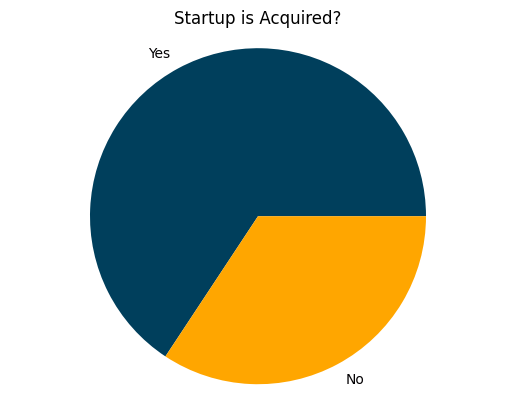

In [27]:
status_count = data["status"].value_counts().to_dict()
fig, ax = plt.subplots()
grph= ax.pie(x=[status_count['acquired'], status_count['closed']], labels=['Yes','No'],
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
grph= ax.axis('equal')
grph = ax.set_title('Startup is Acquired?')

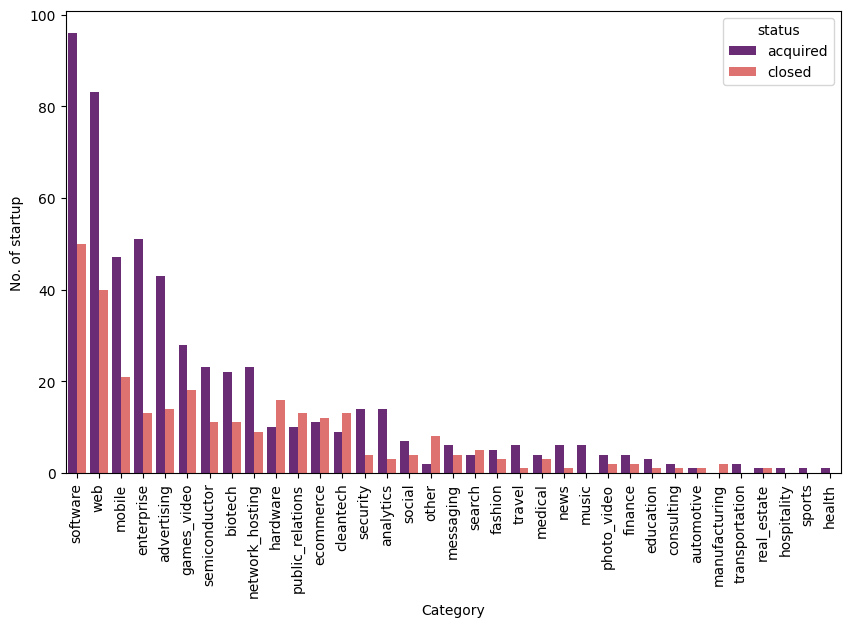

In [28]:
fig, ax = plt.subplots(figsize=(10,6))

startup_category = sns.countplot(x="category_code", hue="status", data=data, palette="magma",
              order=data.category_code.value_counts().index)

startup_category = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
startup_category = ax.set(xlabel="Category", ylabel="No. of startup")
plt.show()

Most of the startups are based on software, followed by web and mobile field. The startups related to hardware, ecommerce, public relations and cleantech were unsuccessful.

In [29]:
fig3=px.bar(data,x=data['category_code'],y=data['funding_total_usd'],title="Total funding VS Category",color='category_code')
fig3.show()

From the above bar graph we can infer that mobile field was most funded, followed by software and biotech.

In [30]:
data_success_cate=data[data['labels']==1].groupby(['category_code']).agg({'labels':'count'}).reset_index()

data_success_cate.columns=['category_code','total_success']

data_success_cate=data_success_cate.sort_values('total_success',ascending=False)

data_success_cate

,category_code,total_success
29,software,96
33,web,83
8,enterprise,51
17,mobile,47
0,advertising,43
11,games_video,28
27,semiconductor,23
19,network_hosting,23
3,biotech,22
1,analytics,14


In [31]:
fig4=px.bar(data_success_cate,x='category_code',y='total_success',color='category_code')
fig4.show()

From the above graph, the following conclusion can be drawn:

The software field was most successful startup field followed by web and enterprise. Whereas, real estate was most disastrous startup field.

In [32]:
states = data.groupby(['state_code']).size().rename('number_of_startups').reset_index()
states = states.sort_values('number_of_startups',ascending=True)
figure = px.bar(states,x = 'state_code',y='number_of_startups',color = 'state_code')
figure.show()

The above graph is between state_code and number_of_startups

We can conclude that California has more startups followed by New York and Massachusetts

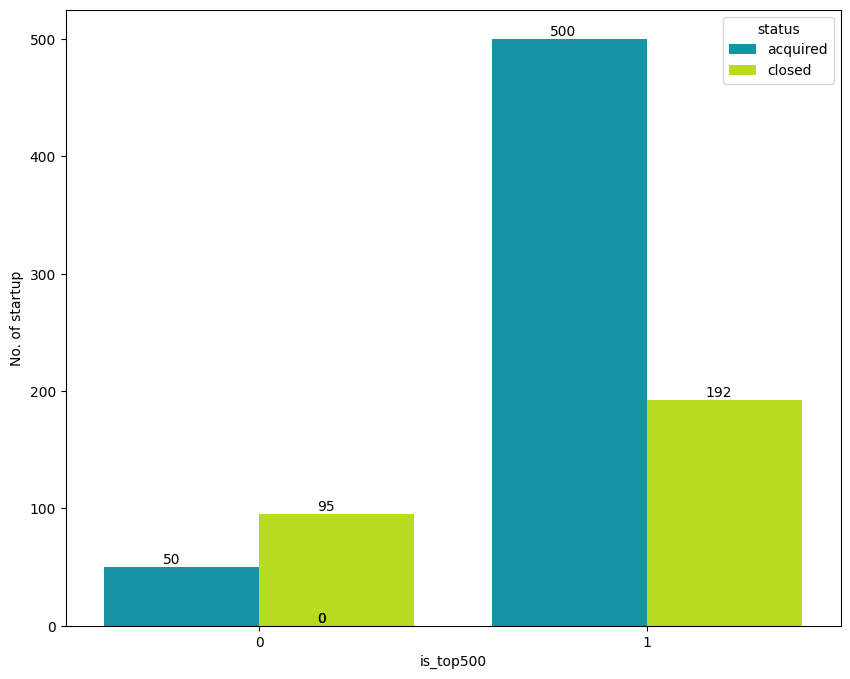

In [33]:
figure, ax = plt.subplots(figsize=(10,8))

plot_grp = sns.countplot(x="is_top500", hue="status", data=data, palette="nipy_spectral",)

plot_grp = ax.set(xlabel="is_top500", ylabel="No. of startup")

for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+2.9))

The above graph shows how many startups listed in the dataset are in top 500.

0 stands for not in top 500 and 1 stands for a startup is in top 500.

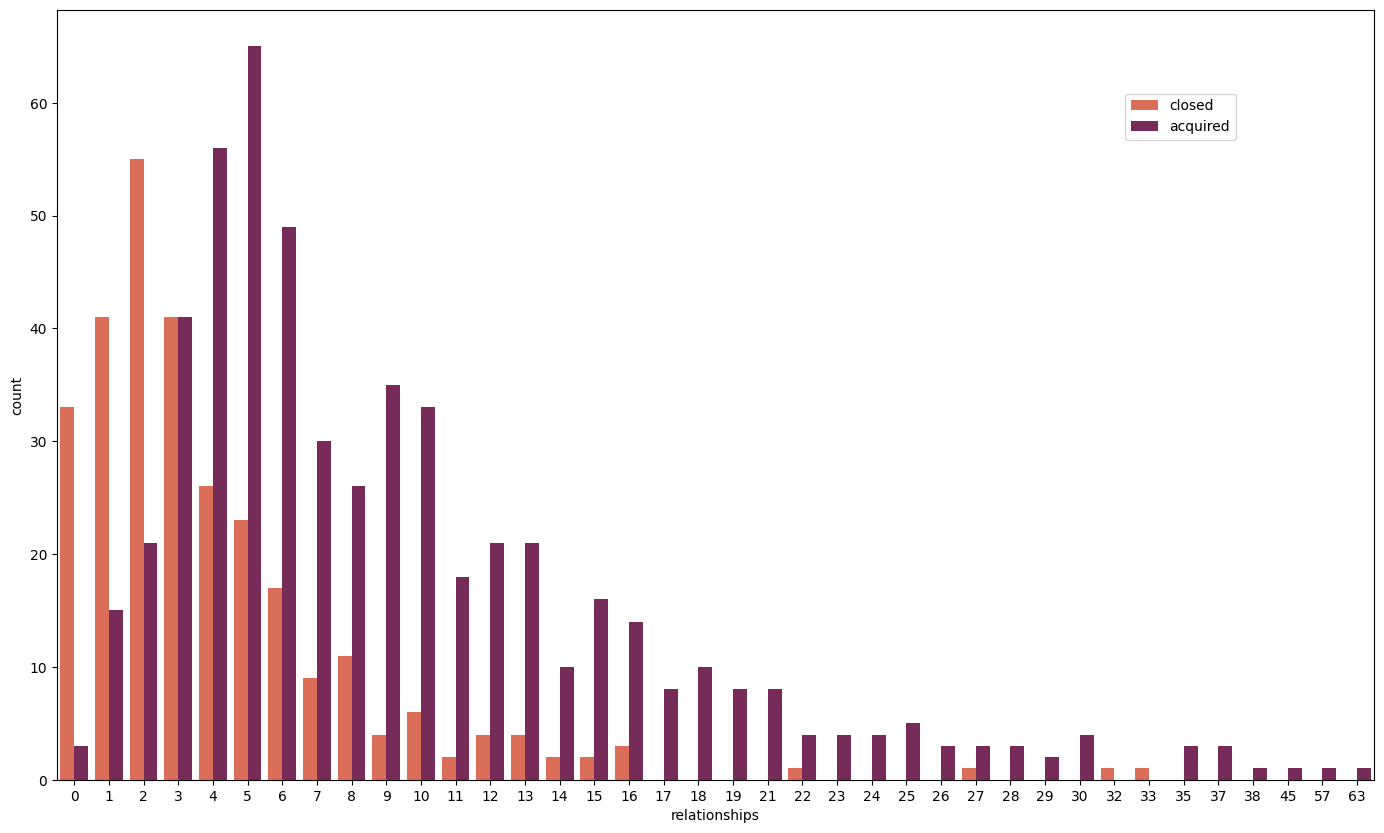

In [34]:
fig, ax = plt.subplots(figsize=(17,10))

sns.countplot(x="relationships", hue="status", data=data, palette="rocket_r",)
plt.legend(bbox_to_anchor=(0.90, 0.90))
plt.show()

The above graph is plotted between relationships and the count of them.

Relationships - It says how many relationship does a startup have. For example a start up can have relationships with accountants, investors, vendors, mentors, etc.

Most startups have 5 relationships

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 922
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   837 non-null    int64         
 1   state_code                   837 non-null    object        
 2   latitude                     837 non-null    float64       
 3   longitude                    837 non-null    float64       
 4   zip_code                     837 non-null    object        
 5   id                           837 non-null    object        
 6   city                         837 non-null    object        
 7   name                         837 non-null    object        
 8   labels                       837 non-null    int64         
 9   founded_at                   837 non-null    datetime64[ns]
 10  closed_at                    294 non-null    datetime64[ns]
 11  first_funding_at             837 non-null    objec

**Drop Unused columns**

In [36]:
data4 = data.drop(['latitude','longitude','zip_code'],axis=1)
data4 = data4.drop(['state_code','id','city','name'],axis=1)
data4 = data4.drop(['category_code','object_id'],axis=1)
data4 = data4.drop(['founded_at','closed_at'],axis=1)
data4 = data4.drop(['first_funding_at','last_funding_at'],axis=1)
data4 = data4.drop(['last_date'],axis=1)
data4 = data4.drop(['labels'],axis=1)
data4['status'] = data4.status.map({'acquired':1,'closed':0})
data4 =data4.drop(['Unnamed: 0'],axis=1)

In [37]:
X = data4.drop(['status'],axis=1)
y = data4['status']

In [38]:
data4

,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,...,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status,age,norm_age_first_funding_year,norm_relationships,norm_funding_total_usd
0,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,1,0,...,0,0,0,1.0000,0,1,7.0,0.102727,0.047619,0.000064
1,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,1,0,...,1,1,1,4.7500,1,1,14.0,0.234108,0.142857,0.007033
2,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,1,0,...,0,0,0,4.0000,1,1,5.0,0.047173,0.079365,0.000454
3,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,1,0,...,1,1,1,3.3333,1,1,12.0,0.143018,0.079365,0.007016
4,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,1,0,...,0,0,0,1.0000,1,0,2.0,0.000000,0.031746,0.000226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,1,0,...,0,0,0,6.0000,1,1,5.0,0.023648,0.142857,0.000191
919,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,0,0,...,1,0,0,2.6667,1,0,10.0,0.331208,0.015873,0.009121
920,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,1,0,...,0,0,1,8.0000,1,0,13.0,0.388013,0.079365,0.007717
921,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,1,0,...,1,0,0,1.0000,1,1,5.0,0.034659,0.190476,0.002717


In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
X_train.shape, X_test.shape

((585, 35), (252, 35))

In [41]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.svm import SVC
import plotly.graph_objects as go
from sklearn.metrics import classification_report,auc,confusion_matrix,roc_curve,accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,precision_recall_curve
from sklearn.model_selection import cross_val_score

In [42]:
LR_model= LogisticRegression()
RD_model= RidgeClassifier()
DT_model= DecisionTreeClassifier()
SV_model= SVC()
KNR_model= KNeighborsClassifier()
RFR_model= RandomForestClassifier()
Bag_model=BaggingClassifier()
ADA_model=AdaBoostClassifier()
GB_model= GradientBoostingClassifier()
ETs_model = ExtraTreesClassifier()
ET_model = ExtraTreeClassifier()

model=[LR_model,RD_model,DT_model,SV_model,KNR_model,RFR_model,Bag_model,ADA_model,GB_model,ETs_model,ET_model ]

Accuracy_Score of  LogisticRegression() is 66.66666666666666
F1 SCore                 80.0
Confusion Matrix of  LogisticRegression()  is 
 [[  0  83]
 [  1 168]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.67      0.99      0.80       169

    accuracy                           0.67       252
   macro avg       0.33      0.50      0.40       252
weighted avg       0.45      0.67      0.54       252

ROC curve accuracy :  0.4970414201183432


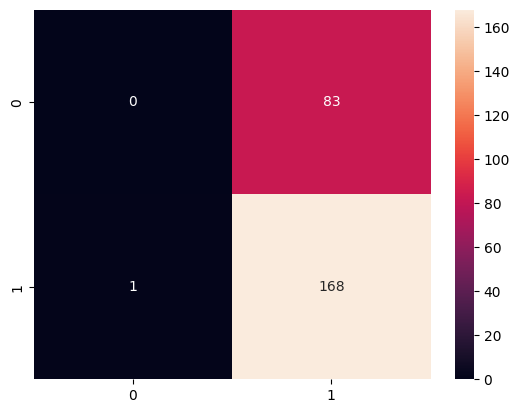

**************************************************
Accuracy_Score of  RidgeClassifier() is 76.5873015873016
F1 SCore                 82.89855072463767
Confusion Matrix of  RidgeClassifier()  is 
 [[ 50  33]
 [ 26 143]]
              precision    recall  f1-score   support

           0       0.66      0.60      0.63        83
           1       0.81      0.85      0.83       169

    accuracy                           0.77       252
   macro avg       0.74      0.72      0.73       252
weighted avg       0.76      0.77      0.76       252

ROC curve accuracy :  0.7242817423540315


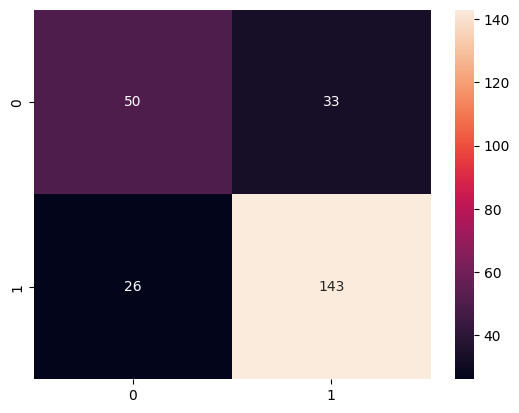

**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 77.77777777777779
F1 SCore                 83.52941176470588
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[ 54  29]
 [ 27 142]]
              precision    recall  f1-score   support

           0       0.67      0.65      0.66        83
           1       0.83      0.84      0.84       169

    accuracy                           0.78       252
   macro avg       0.75      0.75      0.75       252
weighted avg       0.78      0.78      0.78       252

ROC curve accuracy :  0.7454195480145434


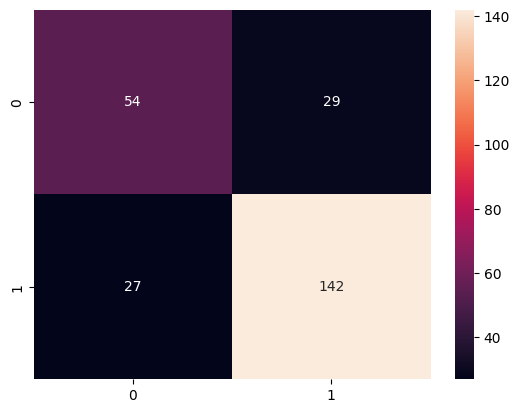

**************************************************
Accuracy_Score of  SVC() is 67.06349206349206
F1 SCore                 80.28503562945369
Confusion Matrix of  SVC()  is 
 [[  0  83]
 [  0 169]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.67      1.00      0.80       169

    accuracy                           0.67       252
   macro avg       0.34      0.50      0.40       252
weighted avg       0.45      0.67      0.54       252

ROC curve accuracy :  0.5


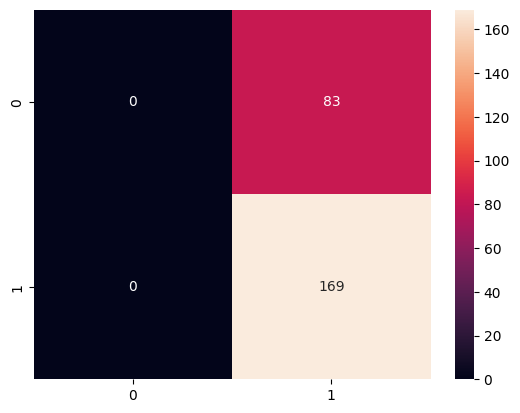

**************************************************
Accuracy_Score of  KNeighborsClassifier() is 61.111111111111114
F1 SCore                 70.65868263473054
Confusion Matrix of  KNeighborsClassifier()  is 
 [[ 36  47]
 [ 51 118]]
              precision    recall  f1-score   support

           0       0.41      0.43      0.42        83
           1       0.72      0.70      0.71       169

    accuracy                           0.61       252
   macro avg       0.56      0.57      0.57       252
weighted avg       0.62      0.61      0.61       252

ROC curve accuracy :  0.5659798959150211


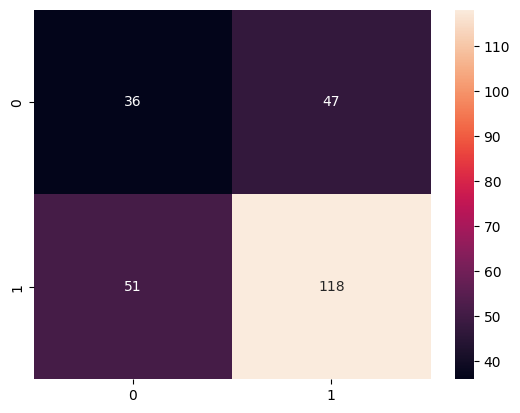

**************************************************
Accuracy_Score of  RandomForestClassifier() is 84.12698412698413
F1 SCore                 88.70056497175142
Confusion Matrix of  RandomForestClassifier()  is 
 [[ 55  28]
 [ 12 157]]
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        83
           1       0.85      0.93      0.89       169

    accuracy                           0.84       252
   macro avg       0.83      0.80      0.81       252
weighted avg       0.84      0.84      0.84       252

ROC curve accuracy :  0.7958223426249377


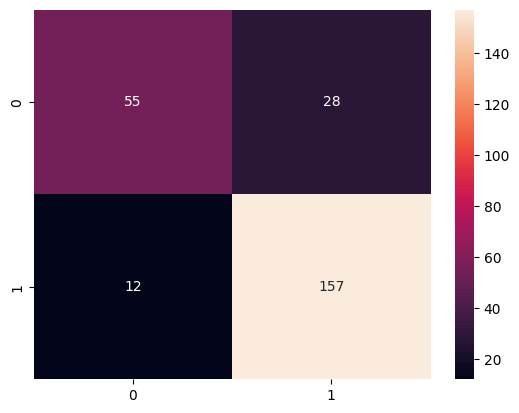

**************************************************
Accuracy_Score of  BaggingClassifier() is 84.12698412698413
F1 SCore                 88.37209302325581
Confusion Matrix of  BaggingClassifier()  is 
 [[ 60  23]
 [ 17 152]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        83
           1       0.87      0.90      0.88       169

    accuracy                           0.84       252
   macro avg       0.82      0.81      0.82       252
weighted avg       0.84      0.84      0.84       252

ROC curve accuracy :  0.8111499251443645


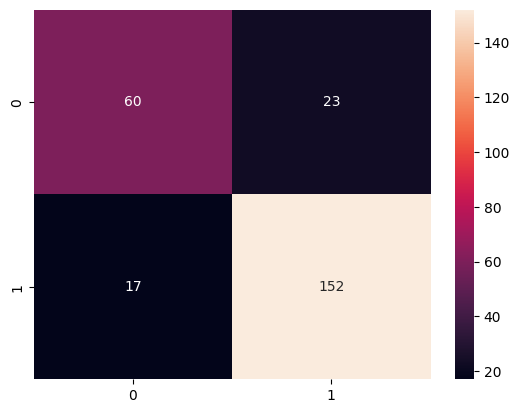

**************************************************
Accuracy_Score of  AdaBoostClassifier() is 81.74603174603175
F1 SCore                 86.3905325443787
Confusion Matrix of  AdaBoostClassifier()  is 
 [[ 60  23]
 [ 23 146]]
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        83
           1       0.86      0.86      0.86       169

    accuracy                           0.82       252
   macro avg       0.79      0.79      0.79       252
weighted avg       0.82      0.82      0.82       252

ROC curve accuracy :  0.7933984458544235


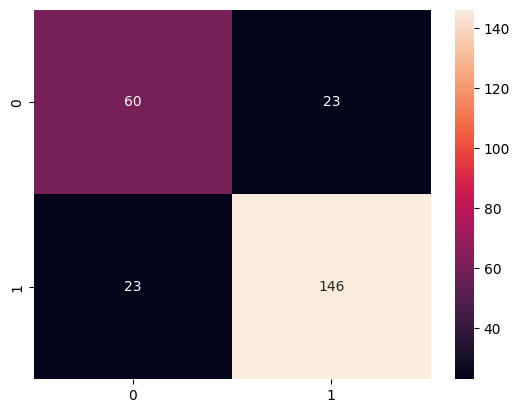

**************************************************
Accuracy_Score of  GradientBoostingClassifier() is 84.52380952380952
F1 SCore                 88.88888888888889
Confusion Matrix of  GradientBoostingClassifier()  is 
 [[ 57  26]
 [ 13 156]]
              precision    recall  f1-score   support

           0       0.81      0.69      0.75        83
           1       0.86      0.92      0.89       169

    accuracy                           0.85       252
   macro avg       0.84      0.80      0.82       252
weighted avg       0.84      0.85      0.84       252

ROC curve accuracy :  0.8049119555143652


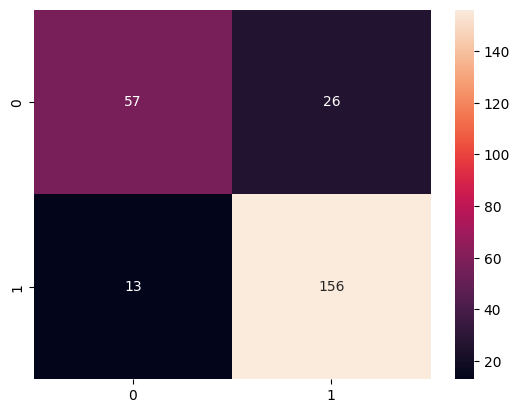

**************************************************
Accuracy_Score of  ExtraTreesClassifier() is 80.95238095238095
F1 SCore                 86.4406779661017
Confusion Matrix of  ExtraTreesClassifier()  is 
 [[ 51  32]
 [ 16 153]]
              precision    recall  f1-score   support

           0       0.76      0.61      0.68        83
           1       0.83      0.91      0.86       169

    accuracy                           0.81       252
   macro avg       0.79      0.76      0.77       252
weighted avg       0.81      0.81      0.80       252

ROC curve accuracy :  0.7598916375561416


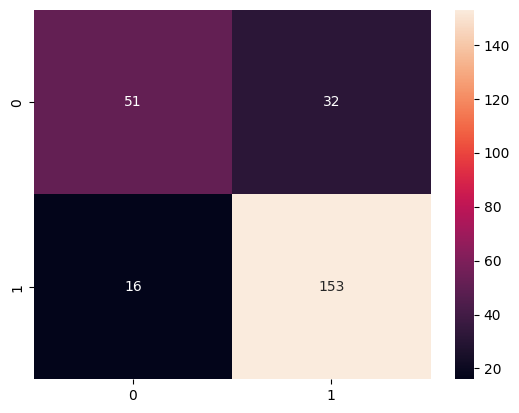

**************************************************
Accuracy_Score of  ExtraTreeClassifier() is 71.82539682539682
F1 SCore                 78.93175074183976
Confusion Matrix of  ExtraTreeClassifier()  is 
 [[ 48  35]
 [ 36 133]]
              precision    recall  f1-score   support

           0       0.57      0.58      0.57        83
           1       0.79      0.79      0.79       169

    accuracy                           0.72       252
   macro avg       0.68      0.68      0.68       252
weighted avg       0.72      0.72      0.72       252

ROC curve accuracy :  0.6826477507663791


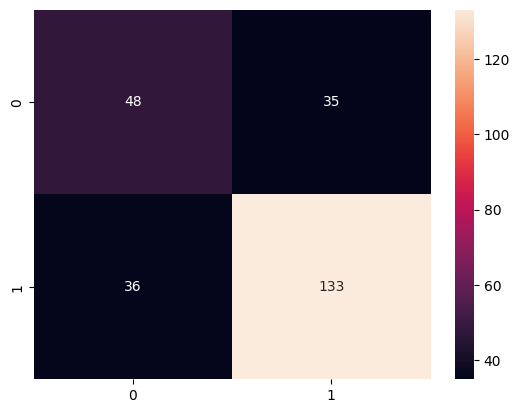

**************************************************


,Model,Accuracy,F1 Score
0,LogisticRegression(),66.67,80.00
1,RidgeClassifier(),76.59,82.90
2,DecisionTreeClassifier(),77.78,83.53
3,SVC(),67.06,80.29
4,KNeighborsClassifier(),61.11,70.66
5,"(DecisionTreeClassifier(max_features='sqrt', r...",84.13,88.70
6,(DecisionTreeClassifier(random_state=113269773...,84.13,88.37
7,"(DecisionTreeClassifier(max_depth=1, random_st...",81.75,86.39
8,([DecisionTreeRegressor(criterion='friedman_ms...,84.52,88.89
9,"(ExtraTreeClassifier(random_state=1301726027),...",80.95,86.44


In [43]:
accuracy=[]
f1=[]

for m in model:
    m.fit(X_train,y_train)
    m.score(X_train,y_train)
    pred= m.predict(X_test)
    accuracy.append(round(accuracy_score(y_test,pred) * 100, 2))
    f1.append(round(f1_score(y_test,pred) * 100, 2))
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred)*100)
    print("F1 SCore                ", f1_score(y_test,pred)*100)
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc_rand = auc(false_positive_rate, true_positive_rate)
    print("ROC curve accuracy : ",roc_auc_rand)

    # confusion matrix
    from sklearn.metrics import confusion_matrix
    confusion_matrix(y_test,pred)
    sns.heatmap(confusion_matrix(y_test,pred),annot=True, fmt='d')
    plt.show()

    # Gauge meter
    metric_value = accuracy_score(y_test,pred)*100
    fig = go.Figure(go.Indicator(
    mode="gauge+number",
    value=metric_value,
    title={'text': "Model Accuracy (%)"},
    gauge={
        'axis': {'range': [0, 100]},
        'bar': {'color': "darkblue"},
        'steps': [
            {'range': [0, 50], 'color': "red"},
            {'range': [50, 80], 'color': "yellow"},
            {'range': [80, 100], 'color': "green"}
        ],
    }
    ))

# Display the gauge
    fig.show()



    print('*'*50)

pd.DataFrame({'Model':model,'Accuracy':accuracy,'F1 Score':f1})

**Preparing Data for Feature Imp**

In [44]:
data_f=data

data_f = data_f.drop(['state_code','city','name','labels','founded_at','closed_at','first_funding_at','last_funding_at','category_code','last_date','object_id'],axis=1)

In [45]:
data_f= data_f.drop('zip_code',axis=1)

In [46]:
data_f['id']=data_f['id'].str.replace('c:','')

In [47]:
data_f['id'] = data_f['id'].astype(int)

In [48]:
data_f['status'] = data_f.status.map({'acquired':1,'closed':0})

In [49]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 922
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   837 non-null    int64  
 1   latitude                     837 non-null    float64
 2   longitude                    837 non-null    float64
 3   id                           837 non-null    int64  
 4   age_first_funding_year       837 non-null    float64
 5   age_last_funding_year        837 non-null    float64
 6   age_first_milestone_year     837 non-null    float64
 7   age_last_milestone_year      837 non-null    float64
 8   relationships                837 non-null    int64  
 9   funding_rounds               837 non-null    int64  
 10  funding_total_usd            837 non-null    int64  
 11  milestones                   837 non-null    int64  
 12  is_CA                        837 non-null    int64  
 13  is_NY                    

In [50]:
X_f = data_f.drop(['status'],axis=1)
y_f = data_f['status']

In [51]:
X_train_f, X_test_f,y_train_f,y_test_f = train_test_split(X_f,y_f,test_size = 0.40,random_state = 0)

In [52]:
model_f = RandomForestClassifier(n_estimators=100)
model_f.fit(X_train_f,y_train_f)

RandomForestClassifier()

In [53]:
rf_f = model_f.feature_importances_

In [54]:
lst_f = list(X_f.columns)
x_train_pd_f = pd.DataFrame(X_train_f,columns=lst_f)

In [55]:
rf_f = pd.Series(rf_f)
rf_f.index = x_train_pd_f.columns
rf_f.sort_values(ascending=False)

,0
age,0.112920
age_last_milestone_year,0.081302
relationships,0.070569
norm_relationships,0.066381
age_first_milestone_year,0.060733
funding_total_usd,0.055748
age_first_funding_year,0.054497
norm_funding_total_usd,0.053550
Unnamed: 0,0.047170
norm_age_first_funding_year,0.046736


**Applying Random Forest after feature selection using Random Forest**

In [56]:
X_f['longitude']= X_f['longitude'].abs()

In [57]:
rf_f =rf_f.sort_values(ascending=False)

lst3 = list(rf_f[0:20].index)

In [58]:
data_f1= data_f[lst3]
data_f2 = data_f['status']

In [59]:
data_f1_train, data_f1_test,data_f2_train,data_f2_test = train_test_split(data_f1,data_f2,
                                                                          test_size = 0.30,random_state = 0)

In [60]:
rand_forest_f = RandomForestClassifier()

rand_forest_f.fit(data_f1_train,data_f2_train)


data_f2_pred_rf = rand_forest_f.predict(data_f1_test)

print("Training Accuracy :", rand_forest_f.score(data_f1_train, data_f2_train)*100)
print("Testing Accuracy :", rand_forest_f.score(data_f1_test, data_f2_test)*100)

cmatrix_f = confusion_matrix(data_f2_test, data_f2_pred_rf)
print()
print("Confusion matrix : ")
print(cmatrix_f)
print()


creport_f = classification_report(data_f2_test, data_f2_pred_rf)
print("Classification report : ")
print()
print(creport_f)

false_positive_rate, true_positive_rate, thresholds = roc_curve(data_f2_test,data_f2_pred_rf)
roc_auc_rand_f = auc(false_positive_rate, true_positive_rate)
print("ROC curve accuracy : ",roc_auc_rand_f)

precision, recall, thresholds = precision_recall_curve(data_f2_test, data_f2_pred_rf)
f1_f = f1_score(data_f2_test, data_f2_pred_rf)
Precision_Recall_rfs_f = auc(recall, precision)
print("Precision Recall Curves :",Precision_Recall_rfs_f)

Training Accuracy : 100.0
Testing Accuracy : 84.52380952380952

Confusion matrix : 
[[ 56  27]
 [ 12 157]]

Classification report : 

              precision    recall  f1-score   support

           0       0.82      0.67      0.74        83
           1       0.85      0.93      0.89       169

    accuracy                           0.85       252
   macro avg       0.84      0.80      0.82       252
weighted avg       0.84      0.85      0.84       252

ROC curve accuracy :  0.8018464390104797
Precision Recall Curves : 0.9149370000122509


In [61]:
from sklearn.feature_selection import SelectKBest

from sklearn.feature_selection import chi2

**Use Chi Squared test**

In [62]:
# Feature extraction
chi_best_f = SelectKBest (score_func=chi2, k=4)
k_best_f = chi_best_f.fit(X_f, y_f)
# Summarize scores
np.set_printoptions(precision=3)
print(k_best_f.scores_)
feature_f = pd.DataFrame(k_best_f.scores_)
exp_f = np.sort(k_best_f.scores_)

[1.034e+03 1.954e+00 4.070e+00 1.129e+06 3.151e+01 3.967e+00 1.503e+02
 2.802e+02 7.356e+02 3.143e+01 1.856e+09 8.572e+01 1.753e+00 2.898e+00
 6.455e+00 2.437e+00 1.671e+01 1.173e-04 1.708e-01 3.503e-01 5.549e+00
 2.394e+00 4.785e-01 3.265e+00 1.338e-02 1.216e-03 2.758e+00 1.520e+00
 1.645e+00 1.020e+01 2.150e+01 1.371e+01 1.319e+01 3.195e+01 1.315e+01
 1.207e+02 1.439e+00 1.168e+01 3.257e-01]


In [63]:
fe_f = pd.DataFrame(data=feature_f)
fe_f['columns_name'] = lst_f
fe_f.rename(columns = {'0':'values'}, inplace = True)
fe_f.set_index("columns_name",inplace=True)
fe_f = fe_f.sort_values(by=[0], ascending=False)
fe_f

,0
columns_name,
funding_total_usd,1.855822e+09
id,1.128604e+06
Unnamed: 0,1.033785e+03
relationships,7.356157e+02
age_last_milestone_year,2.802070e+02
age_first_milestone_year,1.503360e+02
age,1.207228e+02
milestones,8.572063e+01
avg_participants,3.194674e+01


In [64]:
lst4 = list(fe_f[0:15].index)

data_fea = data_f[lst4]

data_out = data_f['status']

In [65]:
data_fea_train, data_fea_test,data_out_train,data_out_test = train_test_split(data_fea,data_out,
                                                                          test_size = 0.30,random_state = 0)

**Random Forest after Feature selection**

In [66]:
random = RandomForestClassifier()
print(random)
random.fit(data_fea_train,data_out_train)


data_out_pred = random.predict(data_fea_test)

print("Training Accuracy :", random.score(data_fea_train, data_out_train)*100)
print("Testing Accuracy :", random.score(data_fea_test, data_out_test)*100)

randacc_chi= random.score(data_fea_test, data_out_test)*100

conmatrix = confusion_matrix(data_out_test, data_out_pred)
print()
print("Confusion matrix : ")
print(conmatrix)
print()


classreport = classification_report(data_out_test, data_out_pred)
print("Classification report : ")
print()
print(classreport)

false_positive_rate, true_positive_rate, thresholds = roc_curve(data_out_test,data_out_pred)
roc_auc_chi = auc(false_positive_rate, true_positive_rate)
print("ROC curve accuracy : ",roc_auc_chi)

precision, recall, thresholds = precision_recall_curve(data_out_test, data_out_pred)
f1_f = f1_score(data_out_test, data_out_pred)
Precision_Recall_rfs_f = auc(recall, precision)
print("Precision Recall Curves :",Precision_Recall_rfs_f)

RandomForestClassifier()
Training Accuracy : 100.0
Testing Accuracy : 86.90476190476191

Confusion matrix : 
[[ 58  25]
 [  8 161]]

Classification report : 

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        83
           1       0.87      0.95      0.91       169

    accuracy                           0.87       252
   macro avg       0.87      0.83      0.84       252
weighted avg       0.87      0.87      0.86       252

ROC curve accuracy :  0.8257289513081914
Precision Recall Curves : 0.9250000757444926


In [67]:
log = LogisticRegression()
print(log)
from sklearn.preprocessing import StandardScaler

sc_chi = StandardScaler()

data_fea_train_f = sc_chi.fit_transform(data_fea_train)

data_fea_test_f = sc_chi.fit_transform(data_fea_test)

log.fit(data_fea_train_f,data_out_train)

predictions_chi = log.predict(data_fea_test_f)

print("Training Accuracy :", log.score(data_fea_train_f, data_out_train)*100)
print("Testing Accuracy :", log.score(data_fea_test_f, data_out_test)*100)

logacc_chi=log.score(data_fea_test_f, data_out_test)*100

con_matrix_chi = confusion_matrix(data_out_test,predictions_chi)
print()
print("Confusion matrix : ")
print(con_matrix_chi)
print()


clas_report_chi = classification_report(data_out_test, predictions_chi)
print("Classification report : ")
print()
print(clas_report_chi)

false_positive_rate, true_positive_rate, thresholds = roc_curve(data_out_test,predictions_chi)
roc_auc_log_chi = auc(false_positive_rate, true_positive_rate)
print("ROC curve accuracy : ",roc_auc_log_chi)

precision2, recall2, thresholds = precision_recall_curve(data_out_test, predictions_chi)
f2 = f1_score(data_out_test, predictions_chi)
Precision_Recall_log = auc(recall2, precision2)
print("Precision Recall Curves :",Precision_Recall_log)

LogisticRegression()
Training Accuracy : 85.64102564102564
Testing Accuracy : 81.34920634920636

Confusion matrix : 
[[ 57  26]
 [ 21 148]]

Classification report : 

              precision    recall  f1-score   support

           0       0.73      0.69      0.71        83
           1       0.85      0.88      0.86       169

    accuracy                           0.81       252
   macro avg       0.79      0.78      0.79       252
weighted avg       0.81      0.81      0.81       252

ROC curve accuracy :  0.7812433164611108
Precision Recall Curves : 0.9048238454737129


In [68]:
dtc_ = DecisionTreeClassifier(random_state = 100,max_depth=3, min_samples_leaf=5)
print(dtc_)
dtc_.fit(data_fea_train, data_out_train)

data_out_pred_dt = dtc_.predict(data_fea_test)

print("Training Accuracy :", dtc_.score(data_fea_train, data_out_train)*100)
print("Testing Accuracy :", dtc_.score(data_fea_test, data_out_test)*100)

dtacc_chi= dtc_.score(data_fea_test, data_out_test)*100

con_matrix_dt_ = confusion_matrix(data_out_test,data_out_pred_dt)


print()
print("Confusion matrix : ")
print(con_matrix_dt_)
print()

clas_report_dt_ = classification_report(data_out_test, data_out_pred_dt)
print(clas_report_dt_)

false_positive_rate, true_positive_rate, thresholds = roc_curve(data_out_test,data_out_pred_dt)
roc_auc_dt_ = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc_dt_)

precision, recall, thresholds = precision_recall_curve(data_out_test, data_out_pred_dt)
f1 = f1_score(data_out_test, data_out_pred_dt)
Precision_Recall_dt_chi = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_dt_chi)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)
Training Accuracy : 82.05128205128204
Testing Accuracy : 83.33333333333334

Confusion matrix : 
[[ 57  26]
 [ 16 153]]

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        83
           1       0.85      0.91      0.88       169

    accuracy                           0.83       252
   macro avg       0.82      0.80      0.81       252
weighted avg       0.83      0.83      0.83       252

ROC Curves              = 0.7960362158693947
Precision-Recall Curves = 0.9117830553155005


In [69]:
gb_ = GradientBoostingClassifier()
print(gb_)

gb_.fit(data_fea_train, data_out_train)

y_pred_gb_ = gb_.predict(data_fea_test)

print("Training Accuracy :", gb_.score(data_fea_train, data_out_train)*100)
print("Testing Accuracy :", gb_.score(data_fea_test, data_out_test)*100)

gbacc_chi=gb_.score(data_fea_test, data_out_test)*100

con_matrix_gb_ = confusion_matrix(data_out_test,y_pred_gb_)


print()
print("Confusion matrix : ")
print(con_matrix_gb_)
print()

clas_report_gb_ = classification_report(data_out_test, y_pred_gb_)
print(clas_report_gb_)

false_positive_rate, true_positive_rate, thresholds = roc_curve(data_out_test,y_pred_gb_)
roc_auc_gb_ = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc_gb_)

precision, recall, thresholds = precision_recall_curve(data_out_test, y_pred_gb_)
f1 = f1_score(data_out_test, y_pred_gb_)
Precision_Recall_gb_ = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_gb_)

GradientBoostingClassifier()
Training Accuracy : 96.92307692307692
Testing Accuracy : 85.71428571428571

Confusion matrix : 
[[ 59  24]
 [ 12 157]]

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        83
           1       0.87      0.93      0.90       169

    accuracy                           0.86       252
   macro avg       0.85      0.82      0.83       252
weighted avg       0.86      0.86      0.85       252

ROC Curves              = 0.8199187281671062
Precision-Recall Curves = 0.9220082226882056


**Feature selection using Decision Tree**

In [70]:
X_f_ = data_f.drop(['status'],axis=1)
y_f_ = data_f['status']

In [71]:
X_train_f_, X_test_f_,y_train_f_,_test_f_ = train_test_split(X_f_,y_f_, test_size = 0.40, random_state = 0)

In [72]:
mod = DecisionTreeClassifier()
mod.fit(X_train_f_,y_train_f_)

DecisionTreeClassifier()

In [73]:
dtc_mod = mod.feature_importances_

In [74]:
lst_f_ = list(X_f_.columns)
x_train_pd_f_ = pd.DataFrame(X_train_f_,columns=lst_f_)

In [75]:
dtc_mod = pd.Series(dtc_mod)
dtc_mod.index = x_train_pd_f_.columns
dtc_mod.sort_values(ascending=False)

,0
age_last_milestone_year,0.207192
norm_funding_total_usd,0.136512
age,0.125977
norm_age_first_funding_year,0.113172
id,0.077268
age_first_funding_year,0.041104
longitude,0.039660
relationships,0.038864
Unnamed: 0,0.029560
is_software,0.028963


In [76]:
X_f_['longitude']= X_f_['longitude'].abs()

In [77]:
dtc_mod=dtc_mod.sort_values(ascending=False)

lst5 = list(dtc_mod[0:15].index)

In [78]:
data_f1_= data_f[lst5]
data_f2_ = data_f['status']

In [79]:
xtrain, xtest,ytrain,ytest = train_test_split(data_f1_,data_f2_,test_size = 0.30,random_state = 0)

In [80]:
d = DecisionTreeClassifier(random_state = 100,max_depth=3, min_samples_leaf=5)

d.fit(xtrain, ytrain)

ypred_dt = d.predict(xtest)

print("Training Accuracy :", d.score(xtrain, ytrain)*100)
print("Testing Accuracy :", d.score(xtest, ytest)*100)

matrix_dt_ = confusion_matrix(ytest,ypred_dt)


print()
print("Confusion matrix : ")
print(matrix_dt_)
print()

report_dt_ = classification_report(ytest, ypred_dt)
print(report_dt_)

false_positive_rate, true_positive_rate, thresholds = roc_curve(ytest,ypred_dt)
roc_auc_y = auc(false_positive_rate, true_positive_rate)
print("ROC Curves              =",roc_auc_y)

precision, recall, thresholds = precision_recall_curve(ytest, ypred_dt)
f1 = f1_score(ytest, ypred_dt)
Precision_Recall_dt_y = auc(recall, precision)
print("Precision-Recall Curves =",Precision_Recall_dt_y)

Training Accuracy : 82.05128205128204
Testing Accuracy : 83.33333333333334

Confusion matrix : 
[[ 57  26]
 [ 16 153]]

              precision    recall  f1-score   support

           0       0.78      0.69      0.73        83
           1       0.85      0.91      0.88       169

    accuracy                           0.83       252
   macro avg       0.82      0.80      0.81       252
weighted avg       0.83      0.83      0.83       252

ROC Curves              = 0.7960362158693947
Precision-Recall Curves = 0.9117830553155005


**FINAL RESULT**

In [81]:
import plotly.graph_objects as go

accuracy_scores = [
    accuracy_score(y_test, LR_model.predict(X_test)) * 100,
    accuracy_score(y_test, RD_model.predict(X_test)) * 100,
    accuracy_score(y_test, DT_model.predict(X_test)) * 100,
    accuracy_score(y_test, SV_model.predict(X_test)) * 100,
    accuracy_score(y_test, KNR_model.predict(X_test)) * 100,
    accuracy_score(y_test, RFR_model.predict(X_test)) * 100,
    accuracy_score(y_test, Bag_model.predict(X_test)) * 100,
    accuracy_score(y_test, ADA_model.predict(X_test)) * 100,
    accuracy_score(y_test, GB_model.predict(X_test)) * 100,
    accuracy_score(y_test, ETs_model.predict(X_test)) * 100,
    accuracy_score(y_test, ET_model.predict(X_test)) * 100
]

model_names = ['Logistic', 'Ridge', 'Decision Tree', 'SVC', 'KNN', 'Random forest', 'Bagging', 'Adaboost', 'Gradient boosting', 'Sxtratrees', 'Extratree']

fig = go.Figure(data=[go.Bar(
    x=model_names,
    y=accuracy_scores,
    text=accuracy_scores,
    textposition='auto',
    marker_color=['blue', 'red', 'green', 'purple', 'orange', 'cyan', 'magenta', 'brown', 'gray', 'pink', 'olive']
)])


fig.update_layout(
    title="Accuracy of Models",
    xaxis_title="ML models",
    yaxis_title="Accuracy (in %)",
    yaxis_range=[60, 100]
)

fig.update_traces(width=0.3)


fig.show()


In [82]:
accuracy_scores_chi = [
    accuracy_score(data_out_test, log.predict(data_fea_test_f)) * 100,
    accuracy_score(data_out_test, random.predict(data_fea_test)) * 100,
    accuracy_score(data_out_test, dtc_.predict(data_fea_test)) * 100,
    accuracy_score(data_out_test, gb_.predict(data_fea_test)) * 100,
    accuracy_score(ytest, d.predict(xtest)) * 100,
]


model_names_chi = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 'Decision Tree (Feature Selection)']


fig = go.Figure(data=[go.Bar(
    x=model_names_chi,
    y=accuracy_scores_chi,
    text=accuracy_scores_chi,
    textposition='auto',
    marker_color=['blue', 'red', 'green', 'purple', 'orange']
)])


fig.update_layout(
    title="Accuracy of Models after Feature Selection",
    xaxis_title="ML models",
    yaxis_title="Accuracy (in %)",
    yaxis_range=[60, 100]
)

fig.update_traces(width=0.3)


fig.show()
